## 行列の特異値分解

### 2次元を1次元にする 

In [1]:
import numpy as np

A = np.array(
    [
        [16, 16],
        [-2, 4],
        [-8, -12],
        [19, 5],
        [-5, -3],
        [-1, -15],
        [9, 11],
        [6, -4],
        [-19, -12],
        [-13, -1],
        [14, -2],
        [-18, -22],
    ]
)

### 行列を特異値分解する

In [2]:
U, s, Vt = np.linalg.svd(A, full_matrices=False)

In [3]:
U.shape

(12, 2)

In [4]:
s.shape

(2,)

In [5]:
Vt.shape

(2, 2)

In [6]:
s[0] * U[:, 0]

array([-22.53004482,  -1.01495498,  13.8191628 , -17.81493685,
         5.76356881,  10.34761916, -13.9502204 ,  -2.06341583,
        22.28468254,  10.64324024,  -9.49722766,  27.90044081])

### 特異値分解の詳細

In [7]:
np.linalg.matrix_rank(A)

2

In [8]:
np.diag(s)

array([[53.24143255,  0.        ],
       [ 0.        , 22.09863933]])

In [9]:
U @ np.diag(s) @ Vt

array([[ 16.,  16.],
       [ -2.,   4.],
       [ -8., -12.],
       [ 19.,   5.],
       [ -5.,  -3.],
       [ -1., -15.],
       [  9.,  11.],
       [  6.,  -4.],
       [-19., -12.],
       [-13.,  -1.],
       [ 14.,  -2.],
       [-18., -22.]])

In [10]:
U[:, 0] @ U[:, 1]

-1.3877787807814457e-16

In [11]:
for i in range(U.shape[1]):
    print(
        f"{i+1}列目のノルム",
        np.linalg.norm(U[:, i]),
    )

1列目のノルム 0.9999999999999999
2列目のノルム 0.9999999999999998


In [12]:
Vt.T[:, 0] @ Vt.T[:, 1]

0.0

In [13]:
for i in range(Vt.shape[1]):
    print(
        f"{i+1}列目のノルム",
        np.linalg.norm(Vt.T[:, i]),
    )

1列目のノルム 0.9999999999999999
2列目のノルム 0.9999999999999999


In [14]:
U[:, 0] * s[0]

array([-22.53004482,  -1.01495498,  13.8191628 , -17.81493685,
         5.76356881,  10.34761916, -13.9502204 ,  -2.06341583,
        22.28468254,  10.64324024,  -9.49722766,  27.90044081])

In [17]:
A @ Vt.T[:, 0]

array([-22.53004482,  -1.01495498,  13.8191628 , -17.81493685,
         5.76356881,  10.34761916, -13.9502204 ,  -2.06341583,
        22.28468254,  10.64324024,  -9.49722766,  27.90044081])

In [18]:
Vt.T[:, 0]

array([-0.7695927, -0.6385351])

In [41]:
Vt.T[:, 1]

array([ 0.6385351, -0.7695927])

### 特異値分解と主成分分析

In [19]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
# 結果を1次元配列に変換
pca.fit_transform(X).reshape(-1)

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978,
        1.28482569,  0.93248853,  1.46430232,  0.18331772,  1.08810326,
        0.64166908,  1.09506066, -0.74912267,  1.04413183, -0.0087454 ,
       -0.50784088,  0.51169856,  0.26497651,  0.98493451, -0.17392537,
        0.92786078,  0.66028376,  0.23610499,  0.94473373,  0.04

In [22]:
mean_ = np.mean(X, axis=0)
centered_X = X - mean_

In [23]:
iris_U, iris_s, iris_Vt = np.linalg.svd(centered_X, full_matrices=False)

In [24]:
iris_U[:, 0] * iris_s[0]

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978,
        1.28482569,  0.93248853,  1.46430232,  0.18331772,  1.08810326,
        0.64166908,  1.09506066, -0.74912267,  1.04413183, -0.0087454 ,
       -0.50784088,  0.51169856,  0.26497651,  0.98493451, -0.17392537,
        0.92786078,  0.66028376,  0.23610499,  0.94473373,  0.04

In [25]:
all(np.equal(pca.fit_transform(X).reshape(-1), iris_U[:, 0] * iris_s[0]))

True

In [26]:
# 各成分の寄与率
pca.explained_variance_ratio_

array([0.92461872])

In [27]:
variance = iris_s**2
variance / sum(variance)

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

### 行列の近似

In [28]:
n, d = A.shape
M = np.zeros((n, d))

for i in range(d):
    M += s[i] * U[:, i].reshape(n, -1) @ Vt[i].reshape(-1, d)
M

array([[ 16.,  16.],
       [ -2.,   4.],
       [ -8., -12.],
       [ 19.,   5.],
       [ -5.,  -3.],
       [ -1., -15.],
       [  9.,  11.],
       [  6.,  -4.],
       [-19., -12.],
       [-13.,  -1.],
       [ 14.,  -2.],
       [-18., -22.]])

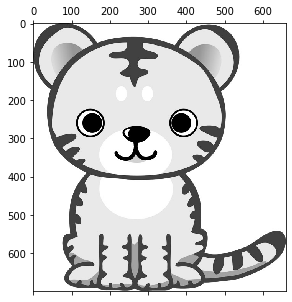

In [29]:
import matplotlib.pyplot as plt
from PIL import Image

# サンプル画像の読み込み
img = Image.open("data/tiger.png")
# カラーを白黒へ変換
img_l = img.convert("L")
# 数値に変換
num_img = np.array(img_l)
# 表示
plt.matshow(num_img, cmap="gray")

In [30]:
img_n, img_d = num_img.shape
img_n, img_d

(700, 660)

In [31]:
np.linalg.matrix_rank(num_img)

660

In [32]:
img_U, img_s, img_Vt = np.linalg.svd(num_img, full_matrices=False)
img_U.shape, img_s.shape, img_Vt.shape

((700, 660), (660,), (660, 660))

In [33]:
def sum_up_k_rank(k):
    rec_img = np.zeros((img_n, img_d))
    for i in range(k):
        # i列目だけ
        _U = img_U[:, i].reshape(img_n, -1)
        # i行目だけ
        _Vt = img_Vt[i].reshape(-1, img_d)
        rec_img += img_s[i] * _U @ _Vt
    return rec_img

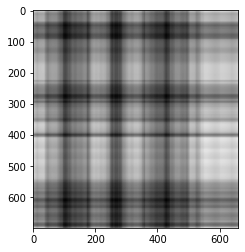

In [34]:
img_1 = sum_up_k_rank(1)
plt.imshow(img_1, cmap="gray")

In [39]:
np.linalg.matrix_rank(img_1)

1

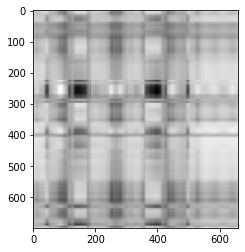

In [40]:
plt.imshow(sum_up_k_rank(2), cmap="gray")

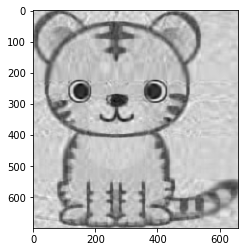

In [41]:
plt.imshow(sum_up_k_rank(20), cmap="gray")

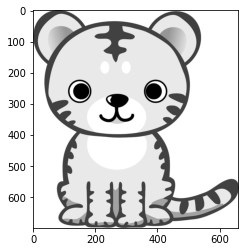

In [42]:
plt.imshow(sum_up_k_rank(660), cmap="gray")

### 特異値分解と固有値・固有ベクトル

In [43]:
B = A.T @ A
B

array([[1878, 1153],
       [1153, 1445]])

In [44]:
eig_value, eig_vector = np.linalg.eig(B)

In [45]:
np.sqrt(eig_value)

array([53.24143255, 22.09863933])

In [46]:
s

array([53.24143255, 22.09863933])

In [47]:
eig_vector.T

array([[ 0.7695927,  0.6385351],
       [-0.6385351,  0.7695927]])

In [48]:
Vt

array([[-0.7695927, -0.6385351],
       [ 0.6385351, -0.7695927]])